In [5]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

# 1. Data Acquisition and Loading

- Link : https://www.kaggle.com/datasets/rabieelkharoua/air-quality-and-health-impact-dataset/data

In [7]:
# read a csv file and create a dataframe
df = pd.read_csv("data/air_quality_health_impact_data.csv")

In [8]:
# Display the top 5 rows of a dataframe
print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [9]:
print("Dimensions of the data frame:", df.shape)

Dimensions of the data frame: (5811, 15)


In [10]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)

In [23]:
# Descriptive Analytics
print("\nSummary Statistics:")
print(df.describe().T)


Summary Statistics:
                      count         mean          std        min          25%  \
RecordID             5811.0  2906.000000  1677.635538   1.000000  1453.500000   
AQI                  5811.0   248.438476   144.777638   0.005817   122.951293   
PM10                 5811.0   148.654997    85.698500   0.015848    75.374954   
PM2_5                5811.0   100.223714    58.096612   0.031549    49.435171   
NO2                  5811.0   102.293445    57.713175   0.009625    53.538538   
SO2                  5811.0    49.456838    28.530329   0.011023    24.887264   
O3                   5811.0   149.312431    86.534240   0.001661    73.999665   
Temperature          5811.0    14.975500    14.483067  -9.990998     2.481500   
Humidity             5811.0    54.776853    26.020786  10.001506    31.995262   
WindSpeed            5811.0     9.989177     5.776950   0.002094     4.952343   
RespiratoryCases     5811.0     9.974187     3.129234   1.000000     8.000000   
Cardiov

In [12]:
# Check for missing values
df.isnull().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

# 2. Visualizations


### 1. Class Distribution Plot for 'HealthImpactClass'

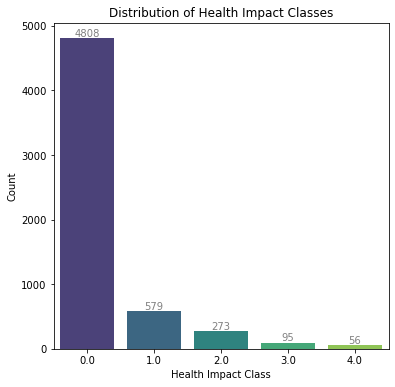

In [13]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='HealthImpactClass', data=df, palette='viridis')
plt.title('Distribution of Health Impact Classes')
plt.xlabel('Health Impact Class')
plt.ylabel('Count')

# Add count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### 2. Correlation Heatmap of Pollutants and Health Impact

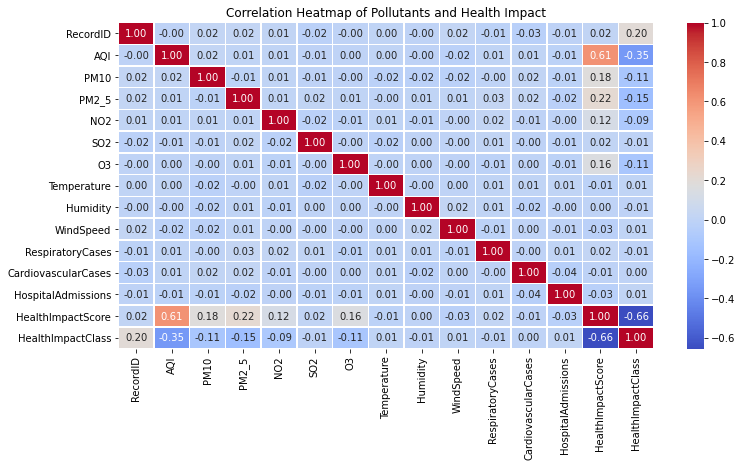

In [14]:
plt.figure(figsize=(12, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and Health Impact")
plt.show()

### 3.Pollutant Concentration vs. Hospitalization Rate

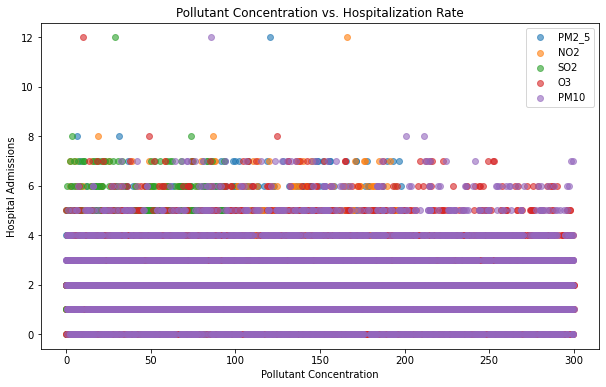

In [15]:
plt.figure(figsize=(10, 6))
pollutants = ["PM2_5", "NO2", "SO2", "O3", "PM10"]

for pollutant in pollutants:
    plt.scatter(df[pollutant], df["HospitalAdmissions"], label=pollutant, alpha=0.6)

plt.xlabel("Pollutant Concentration")
plt.ylabel("Hospital Admissions")
plt.title("Pollutant Concentration vs. Hospitalization Rate")
plt.legend()
plt.show()

### 4. Histogram of PM2.5 Levels

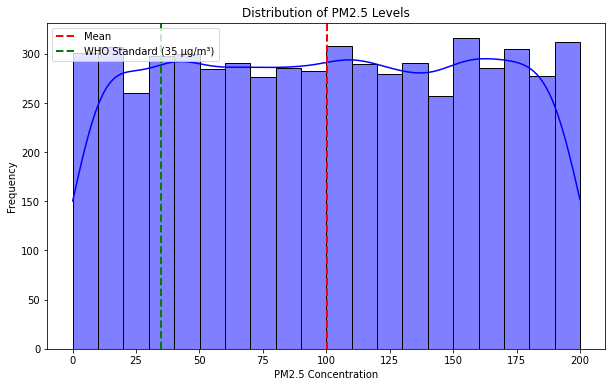

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df["PM2_5"], bins=20, kde=True, color="blue")
plt.axvline(df["PM2_5"].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean")
plt.axvline(35, color="green", linestyle="dashed", linewidth=2, label="WHO Standard (35 µg/m³)")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("Frequency")
plt.title("Distribution of PM2.5 Levels")
plt.legend()
plt.show()

### 5. Feature Importance Plot

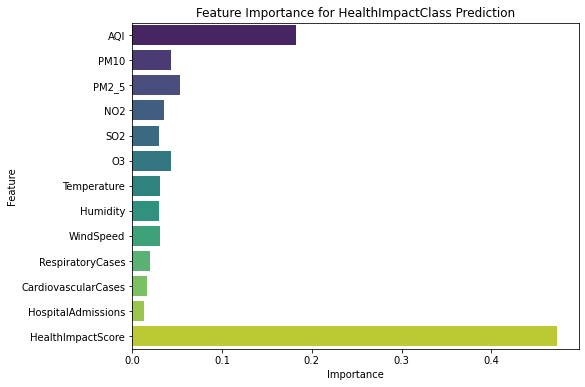

In [33]:
# Prepare the data
X = df.drop(columns=['RecordID', 'HealthImpactClass'])  # Features
y = df['HealthImpactClass']  # Target variable
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables
# Train a random forest model
model = RandomForestClassifier()
model.fit(X, y)
# Plot feature importance
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title('Feature Importance for HealthImpactClass Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### 6. Boxplots of Features

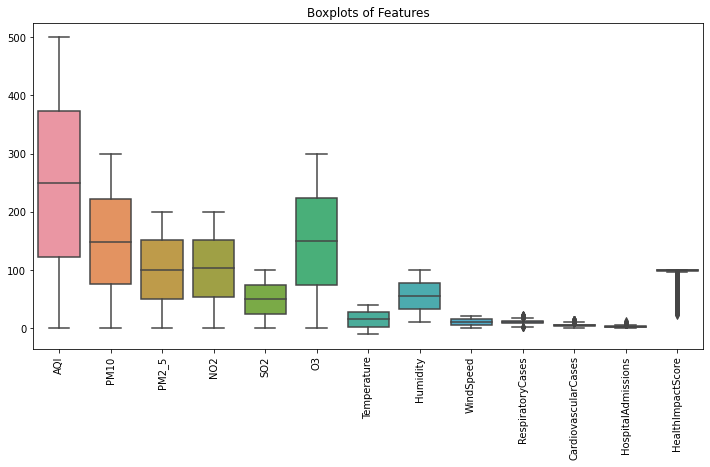

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['RecordID', 'HealthImpactClass']))
plt.xticks(rotation=90)
plt.title("Boxplots of Features")
plt.show()

### 7. Histogram- Feature Distributions

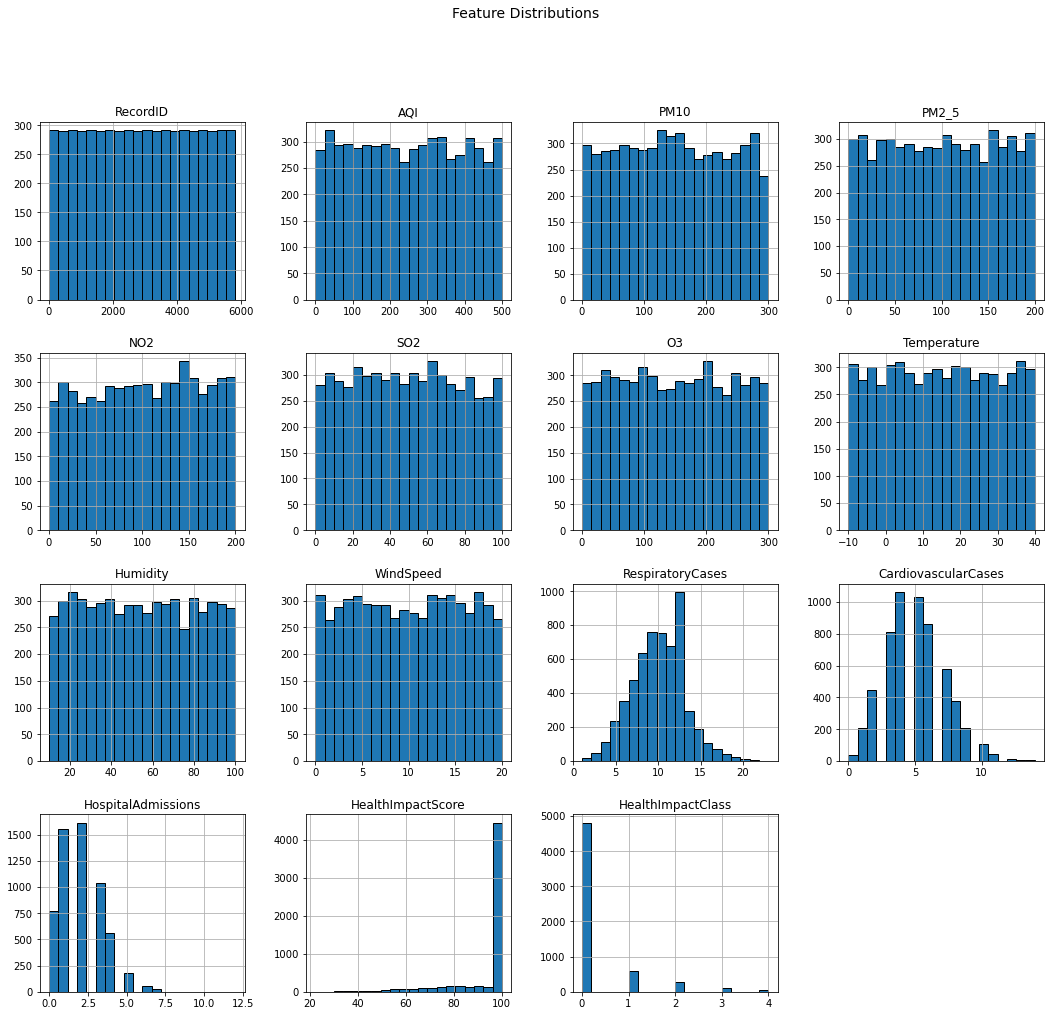

In [20]:
df.hist(figsize=(18, 16), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


### 8. HealthImpact Class Distributions

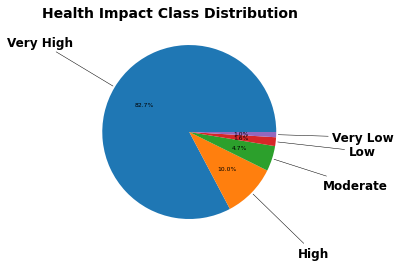

In [21]:
fig, ax = plt.subplots()

# Explode each slice slightly for emphasis
explode = [0.05, 0.05, 0.05, 0.05, 0.05]

# Plot pie chart
wedges, texts, autotexts = ax.pie(
    df['HealthImpactClass'].value_counts(), 
    autopct='%1.1f%%', 
    #colors=custom_palette, 
    # wedgeprops=dict(edgecolor='white', linewidth=1.5)
)

# Adding title and formatting it
plt.title('Health Impact Class Distribution', 
          color='black', 
          fontsize=14, 
          fontweight='bold',
          loc='right')

# Remove the y-axis label
plt.ylabel('')

# Make the percentage text larger and bolder
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(6)
# Add annotations with arrows pointing to wedges
categories = ['Very High', 'High', 'Moderate', 'Low', 'Very Low']

for i, wedge in enumerate(wedges):
    # Get the angle and position for each wedge
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * np.cos(np.radians(angle))
    y = wedge.r * np.sin(np.radians(angle))

    # Define the annotation position
    xtext = x * 2  # Position label further outside the pie chart
    ytext = y * 2

    # Add annotation with an arrow
    ax.annotate(
        categories[i], 
        xy=(x, y),  # Position at the wedge
        xytext=(xtext, ytext),  # Position of the label outside the pie chart
        ha='center', va='center', fontsize=12, fontweight='bold',
        arrowprops=dict(arrowstyle="-", color='black', lw=.5)  # Arrow pointing from wedge to label
    )

# Show the plot
plt.show()

# 3. Data Preparation

**Mean Imputation** : Checked if there any missing values and Replaced missing values with Mean imputation techniques. 

In [35]:
def mean_imputation(df):
    """
    Performs mean imputation on a Pandas DataFrame.

    Args:
    df: The Pandas DataFrame to impute.

    Returns:
    A Pandas DataFrame with missing values imputed using the mean of each column.
    """
    df_imputed = df.copy()  # Create a copy to avoid modifying the original DataFrame
    for col in df_imputed.columns:
        if df_imputed[col].isnull().any():  # Check if the column has any missing values
            mean_val = df_imputed[col].mean()
            df_imputed[col].fillna(mean_val, inplace=True) #Perform the imputation
    return df_imputed

In [36]:
df = mean_imputation(df)

**Feature Elimination** : Removed RecordID as it's not useful feature for assessing the health impact. 

**Scaling**: Standardized numerical features using MinMaxScaler to improve model performance. 



In [24]:
# Define features and target
X = df.drop(columns=["RecordID","HealthImpactClass"])  # Features
y = df["HealthImpactClass"]  # Target variable

# Encode target labels (if categorical)
le = LabelEncoder()
y = le.fit_transform(y)  # Convert to numerical classes

# Feature scaling (Standardization for better performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Train-Test Split**: Divided the dataset into training (80%) and testing (20%) sets.

In [25]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=101)

# 4. Model Development and Evaluation

**Model Training & Evaluation** : Designed and developed ML models

In [30]:
# Model Training and Evaluation
models= {
    "Random Forest": RandomForestClassifier(n_estimators=10, 
                                            random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, 
                             eval_metric='logloss', 
                             random_state=42)
}

Random Forest Model Evaluation:

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.94      0.87      0.90       129
           2       0.96      0.67      0.79        39
           3       1.00      0.36      0.53        22
           4       0.00      0.00      0.00         7

    accuracy                           0.95      1163
   macro avg       0.77      0.58      0.64      1163
weighted avg       0.95      0.95      0.95      1163

Accuracy: 0.9544



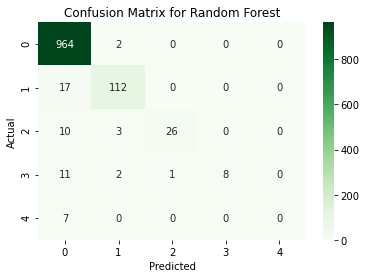

XGBoost Model Evaluation:

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.96      0.87      0.91       129
           2       0.97      0.72      0.82        39
           3       1.00      0.41      0.58        22
           4       0.00      0.00      0.00         7

    accuracy                           0.96      1163
   macro avg       0.78      0.60      0.66      1163
weighted avg       0.95      0.96      0.95      1163

Accuracy: 0.9570



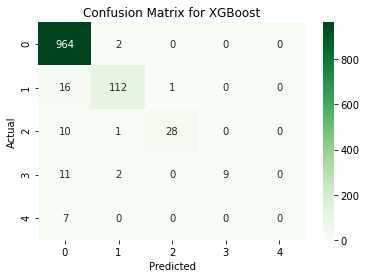

In [31]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Model Evaluation:")
    
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

    # Confusion Matrix
    cm_imbal = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_imbal, annot=True, fmt='d', cmap='Greens')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



In [32]:
# LightGBM Dataset Formatting
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)  # Validation dataset

# LightGBM Parameters
params = {
    "objective": "multiclass",
    "num_class": len(np.unique(y)),  # Number of unique classes
    "metric": "multi_logloss",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "verbose": -1,
}

# Train LightGBM Model with Early Stopping
model = lgb.train(
    params, 
    train_data, 
    valid_sets=[valid_data],  # Fix: Correct validation set format
    num_boost_round=200, 
)

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

LightGBM Model Evaluation:

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.96      0.87      0.91       129
           2       0.88      0.72      0.79        39
           3       1.00      0.27      0.43        22
           4       0.00      0.00      0.00         7

    accuracy                           0.95      1163
   macro avg       0.76      0.57      0.62      1163
weighted avg       0.95      0.95      0.95      1163

Accuracy: 0.9544



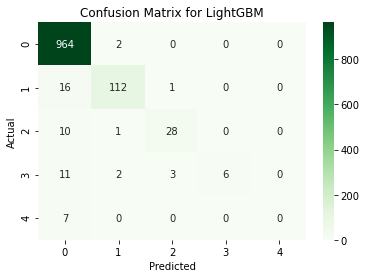

In [34]:
print(f"LightGBM Model Evaluation:")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

# Confusion Matrix
cm_imbal = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_imbal, annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix for LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- XGBoost demonstrated superior predictive performance and should be preferred.